Elisa Stabilini - 28326A

# Tema d'esame 03/02/23

## Consegna

In questo database sono riportati dati sulla mobilità intergenerazionale educativa in vari paesi (fonte World Bank). Si richiede di analizzare il database fornendo delle analisi statistiche in un notebook. Il notebook deve contenere: 
* da 4 a 8 figure debitamente commentate, 
* analisi qualitative e quantitative 
* almeno un test di significatività statistica 
* un fit 

Si consiglia di formulare ipotesi o domande cui si risponde analizzando i dati. Dettagli sul significato di ciascuna colonna sono riportati nel file pdf allegato (vedere Tavola 3 a pag 14-15). Non è necessario analizzare tutti i dati presenti nel database.

## Struttura e descrizione del notebook

Il  notebook si propone estrarre dal dataframe fornito alcune informazioni generali sulla mobilità intergenerazionale sulla base di analisi statistiche. Per motivi di interesse personale e legati alla conoscenza delle dinamiche geo-politiche e sociali, il lavoro all'interno di questo notebook è organizzato in maniera tale da poter studiare i dati più recenti messi a disposizione.
Questo significa che dopo una breve analisi dell'andamento della mobilità educativa intergenerazionale nel tempo, mi sono concentrata sui dati relativi all'ultima generazione che è stata esaminata, ovvero quella degli individui nati negli anni '80 del secolo scorso.

Non potendo fare una analisi completa di tutti i dati ho scleto di concentrarmi sullo studio della mobilità educativa intergenerazionale assoluta e dei fattori che la possono influenzare, tralasciando lo studio della mobilità educativa intergenerazionale relativa. Nello specifico è stato considerato l'andamento nel tempo della mobilità intergenerazionale, studiando come questo varia in base alla posizione geografica dello stato, dopo di che è stata anlizzata la dipendenza della mobilità intergenerazionale dalle condizioni socio-economiche come ad esempio condizione economica della famiglia di provenienza e il genere. 

**Impostazione del notebook**

Per prima cosa il dataframe è importato e visualizzato ed è stato organizzato in maniera tale da rendere più efficiente l'analisi dati e più comprensibile la loro rappresentazione.

La prima sezione del notebook contiene l'analisi qualitativa del dataset, per prima cosa uno studio della variazione nel tempo dell'indice di mobilità intergenerazionale educativa nel tempo distinta per aree geografiche ed economiche. Subito dopo sono riportate due mappe che rappresentano la distribuzione geografica dell'indice di mobilità educativa intergenerazionale e la variazione in questa distribuzione dagli anni '40 agli anni '80. Dopo di che ho continuato l'analisi studiando la distribuzione dell'indice di mobilità intergenerazionale distinguendo sulla base del reddito medio degli individui; all'interno dello studio della dipendenza della mobilità educativa intergenerazionale dal reddito mi sono poi concentrata su come anche la componente di genere possa ifluire; quest'ultima analisi è stata realizzata utilizzando un boxplot.

La seconda sezione del notebook si concentra quindi sullo studio delle correlazioni tra l'indice di mobilotà intergenerazionale e le eventuali categorie di appartenenza degli individui. 

Dopo aver verificato che l'indice di mobilità educativa intergenerazinoale è principalmente correlato al reddito e all'area geografica di provenienza degli individui, mi sono concentrata, nella terza parte del notebook sull'analisi della distribuzione dell'indice di mobilità educativa intergenerazione rispetto eseguendo dei fit con distribuzioni teoriche a questa distribuzione.

L'ultima sezione si concentra poi sulla valutazione dell'efficacia di questi fit, valutazione che è stata eseguita con un test di Kolmogrov-Smirnov.

A termine del notebook è presente una sezione che riporta le conclusioni principali che è stato possibile trarre da questa analisi dati.

**Importazione librerie**

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import geopandas as gp
from geopandas import GeoDataFrame
import scipy
from scipy.stats import trim_mean
from scipy.stats import chi2_contingency
import statsmodels
from statsmodels import robust
from sklearn import preprocessing

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from dython.nominal import identify_nominal_columns
from dython.nominal import associations

## Importazione e visualizzazione del dataframe

Per prima cosa creo un dataframe con pandas e stampo le prime 10 righe, in questo modo posso farmi un'idea della struttura. All'interno del dataframe sono raccolti i dati emeresi da di , in particolare i dati presenti all'interno del dataframe possono essere distinti in dati categorici, come ad esempio quelli riferiti allo stato, alla regione geografica o allo sviluppo della nazione, e dati numerici relativi ai risultati delle analisi che sono state fatte in precedenza a partire dalle singole indagini statistiche. Le informazioni relative all'indagine da cui sono stati ricavati i dati utilizzati sono riportate all'interno della colonna *survey*.

In [3]:
original_df = pd.read_csv("../TemiEsame/data/GDIM_2021_09.csv")

In [4]:
original_df.head(10)

,country,code,region,region_noHICgroup,incgroup2,incgroup3,incgroup4,fragile,survey,year,...,COR,BETA,MU050,BHQ4,Q4Q4,BHQ1,BHQ2,BHQ3,Q4BH,Q4child
0,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,...,0.521676,0.802107,38.267929,0.115412,0.576567,0.343300,0.325300,0.215988,0.160665,0.250315
1,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,...,0.576251,0.848156,31.926859,0.069982,0.505354,0.439815,0.384448,0.105754,0.284408,0.216944
2,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,...,0.521442,0.807674,39.630493,0.125021,0.599029,0.322886,0.312750,0.239342,0.121790,0.258574
3,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,...,0.483760,0.514428,40.513165,0.128599,0.549514,0.335149,0.316313,0.219938,0.192943,0.250296
4,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,...,0.486349,0.491792,31.846794,0.081535,0.491902,0.429669,0.378788,0.110007,0.315896,0.211575
5,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,...,0.497514,0.533891,40.192749,0.138669,0.579161,0.314946,0.302966,0.243418,0.147671,0.259708
6,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,...,0.508277,0.525842,38.309429,0.117449,0.567634,0.344498,0.322526,0.215527,0.169942,0.250342
7,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,...,0.515694,0.514576,31.784191,0.074030,0.485677,0.437706,0.384724,0.103540,0.294973,0.214989
8,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,...,0.521079,0.542071,39.609371,0.126745,0.586995,0.324504,0.309264,0.239487,0.128282,0.259093
9,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,...,0.364753,0.644373,44.856018,0.202485,0.401089,0.276638,0.266406,0.254471,0.352706,0.250291


Per comodità inizio a salvare i nomi delle colonne all'interno di una lista di python, in questo modo posso facilmente ordinarle o riferirmi ad una determinata categoria.

In [5]:
column_names = list(original_df.columns.values)

In [6]:
print(column_names)

['country', 'code', 'region', 'region_noHICgroup', 'incgroup2', 'incgroup3', 'incgroup4', 'fragile', 'survey', 'year', 'status', 'cohort', 'parent', 'child', 'obs', 'P1', 'P2', 'P3', 'P4', 'P5', 'C1', 'C2', 'C3', 'C4', 'C5', 'MEANp', 'MEANc', 'SDp', 'SDc', 'MLD_psu', 'CAT', 'YOS', 'DIF', 'MIX', 'CAT_ISCED0', 'CAT_ISCED1', 'CAT_ISCED2', 'CAT_ISCED34', 'CAT_ISCED5678', 'COR', 'BETA', 'MU050', 'BHQ4', 'Q4Q4', 'BHQ1', 'BHQ2', 'BHQ3', 'Q4BH', 'Q4child']


**Organizzazione del dataframe**:
Il dataframe fornito è già stato oggetto di diverse analisi statistiche, gli stessi dati riportati nel dataframe sono dati già elaborati, anche per questo motivo è facile verificare che non sono presenti NaN o dati nulli. Di conseguenza non è stato necessario effettuare particolari operazioni di pulizia sul dataset.

## Analisi dati qualitativa

### Andamento temporale della mobilità intergenerazionale

Per prima cosa costruisco un nuovo dataframe contenente le informazioni di cui ho bisogno. In questo caso in particolare ho bisogno di fare una media dei dati numerici riportati per tre gruppi di dati gategorici:
* region, che indica la regione geo-economica di appartenenza
* cohort, che indica la generazione dei soggetti di riferimento per l'analisi

Fatta questa operazione ripristino il formato dataframe e lo stampo per verificare la correttezza dei passaggi.

In [7]:
time_df = original_df.groupby(["cohort", "region"]).mean()
time_df = time_df.reset_index()
time_df

,cohort,region,year,obs,P1,P2,P3,P4,P5,C1,...,COR,BETA,MU050,BHQ4,Q4Q4,BHQ1,BHQ2,BHQ3,Q4BH,Q4child
0,1940,East Asia & Pacific,2009.377049,733.868852,0.636495,0.217770,0.073373,0.046699,0.025664,0.441715,...,0.305350,0.408269,44.332658,0.189809,0.396447,0.310874,0.277314,0.221500,0.313859,0.248690
1,1940,Europe & Central Asia,2015.538462,210.355769,0.209647,0.335500,0.196072,0.186347,0.072433,0.052090,...,0.441623,0.421626,40.500120,0.146337,0.500882,0.357970,0.278470,0.214052,0.205291,0.257214
2,1940,High-income economies,2014.691275,733.263982,0.192919,0.344677,0.203201,0.186756,0.072448,0.048649,...,0.443045,0.441158,40.498209,0.143191,0.482568,0.354960,0.282873,0.218737,0.245386,0.252451
3,1940,Latin America & Caribbean,2013.444444,1234.592593,0.709510,0.198516,0.028280,0.044707,0.018987,0.535590,...,0.576470,0.793556,37.902147,0.110009,0.577139,0.368691,0.299185,0.222073,0.173741,0.249659
4,1940,Middle East & North Africa,2011.833333,1132.416667,0.898160,0.068643,0.012846,0.013762,0.006590,0.704166,...,0.281624,0.646715,45.449473,0.219244,0.358817,0.270630,0.260470,0.249652,0.397720,0.252855
5,1940,South Asia,2005.142857,894.000000,0.786594,0.115237,0.065009,0.026643,0.006517,0.727979,...,0.445312,0.723680,44.418358,0.185177,0.365485,0.310377,0.287981,0.223066,0.381401,0.237871
6,1940,Sub-Saharan Africa,2011.291139,622.611814,0.910002,0.062373,0.014210,0.009307,0.004109,0.801119,...,0.324382,0.590892,47.121963,0.217172,0.357421,0.271523,0.262997,0.248088,0.400048,0.255319
7,1950,East Asia & Pacific,2010.285714,1000.857143,0.572170,0.244044,0.088009,0.069839,0.025938,0.369846,...,0.326846,0.546098,44.340255,0.194247,0.389803,0.314719,0.267653,0.219730,0.332872,0.252421
8,1950,Europe & Central Asia,2015.600000,288.591667,0.116825,0.305680,0.235740,0.247790,0.093966,0.020066,...,0.401886,0.341460,40.877036,0.146439,0.477954,0.348699,0.284112,0.220605,0.239610,0.252984
9,1950,High-income economies,2014.691275,990.304251,0.135552,0.307774,0.230199,0.232953,0.093523,0.018723,...,0.409393,0.378458,40.819770,0.146078,0.464624,0.351331,0.283573,0.218712,0.257572,0.250838


Il grafico di seguito rappresenta l'andamento nel tempo dell'indice di mobilità intergenerazionale per le diverse aree geografiche. Sull'asse delle ordinate è riportato il valore dell'indice di mobilità intergenerazionale, sull'asse delle ascisse è riportata la generazione di appartenenza degli intervistati. Si noti che per questo motivo, per *indice di mobilità intergenerazionale del 1950* si intende l'indice di mobilità intergenerazionale per i nati nella generazione del 1950 non il valore di tale indice negli anni '50.

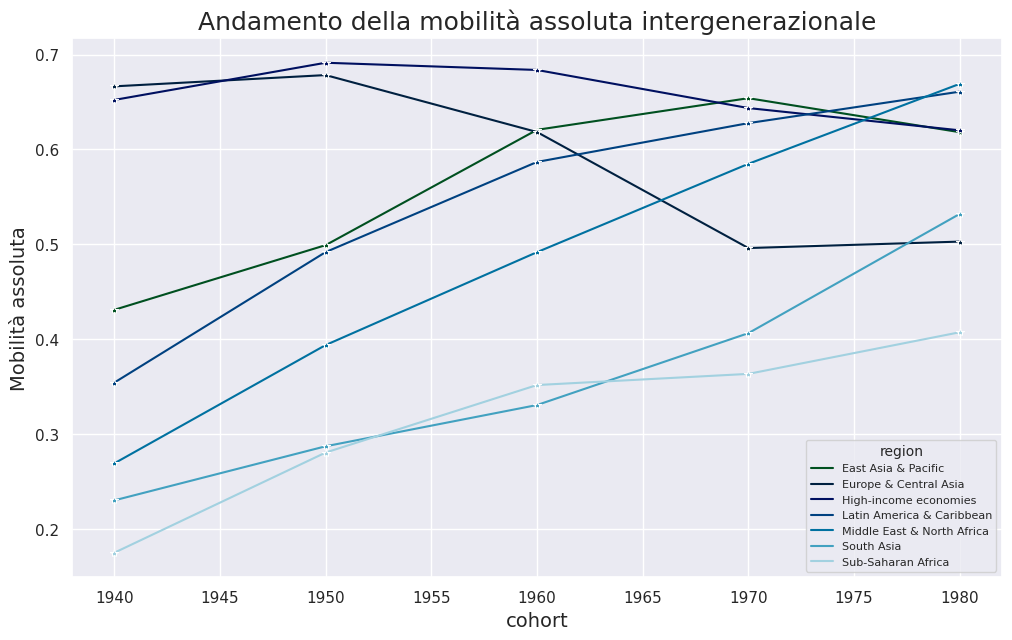

In [8]:
sns.set(rc = {'figure.figsize':(12,7),  "legend.fontsize": 8, "legend.title_fontsize": 10})

ax = sns.lineplot(x=time_df.cohort, y=time_df.CAT, hue=time_df.region,
                  data="time_df", marker="*", palette="ocean")
ax.set_xlabel('cohort', fontsize=14)
ax.set_ylabel('Mobilità assoluta', fontsize=14)
ax.set_title("Andamento della mobilità assoluta intergenerazionale", fontsize=18);

Dal grafico si può osservare come la mobilità educativa intergenerazionale sia complessivamente aumentata e abbia continuato a crescere fino al 1980 per le regioni del pianeta che erano sotto-sviluppate e sono entrate all'interno di un processo di sviluppo economico o che erano già in passato in via di sviluppo. Un'economia porta mediamente ad un miglioramento delle condizioni di vita degli individui che ne fanno parte, e di conseguenza anche un miglioramento della condizione educativa.

Viceversa all'interno delle regioni già ampiamente sviluppate l'indice di mobilità intergenerazionale tende a diminuire segnalando un consolidarsi della condizione educativa degli individui.

### Mobilità intergenerazionale e collocazione geografica

In questa sezione studio come varia la mobilità intergenerazionale nelle diverse aree geografiche del pianeta. Quello che mi aspetto di osservare è un indice di mobilità intergenerazionale mediamente più alto per i paesi con una economia maggiormente sviluppata o in via di sviluppo, e un indice di mobilità intergenerazionale più basso per i paesi meno sviluppati. 
Infatti mentre in un paese in via di sviluppo mi aspetto che ci siano investimenti a favore del miglioramente dell'educazione degli individui, in un paese sotto-sviluppato mi aspetto una condizione educativa più statica per gli individui.

In linea con quanto detto inizialmente, nella descrizione del notebook, ho scelto di analizzare prevalentemenete i dati più recenti a disposizione, per questo motivo di seguito studio la dipendenza dall'area geografica dell'indice di mobilità internazionale negli anni '80. Presento inoltre un plot della mobilità intergenerazionale negli anni '40 per poter osservare meglio come questa si è modificata nel tempo. 

Per rendere la visualizzazione dei dati il più immediata possibile ho scelto di presentare una mappa del globo, assegnando a ciascuno stato un colore sulla base dell'indice di mobilità intergenerazionale.
Per fare questo per prima cosa importo da geopandas il dataframe necessario per poter fare un plot degli stati e lo visualizzo.

In [9]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

In [10]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


Il dataframe di geopandas contiene, per ciascuno stato, informazioni su:
* stima della popolazione
* conetinente di appartenenza
* nome dello stato
* codice ISO3 associato allo stato
* una stima del PIL dello stato
* la *geometria* dello stato, necessaria per farne un plot

Dovendo più avanti maneggiare questo dataframe, ho scelto per comodità di iniziare a rinominarne le colonne.

In [11]:
world.columns=['pop_est', 'continent', 'name', 'code', 'gdp_md_est', 'geometry']

Per realizzare un plot della mobilità assoluta nei diversi paesi del mondo ho bisogno di unire la tavola di geopandas che ho importato come *world* con una tavola di pandas che contenga le informazioni che ho intenzione di plottare. Per questo motivo manipolo il dataframe originale in modo tale da costruire, per questa prima analisi due dataframe: uno che contenga le informazioni sulla mobilità intergenerazionale per il campione di popolazione degli anni '80 e uno per il campione di popolazione per gli anni '40. 

In [12]:
df_80 = original_df.loc[(original_df.cohort == 1980)]
df_40 = original_df.loc[(original_df.cohort == 1940)]

In [13]:
df_80

,country,code,region,region_noHICgroup,incgroup2,incgroup3,incgroup4,fragile,survey,year,...,COR,BETA,MU050,BHQ4,Q4Q4,BHQ1,BHQ2,BHQ3,Q4BH,Q4child
0,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,...,0.521676,0.802107,38.267929,0.115412,0.576567,0.343300,0.325300,0.215988,0.160665,0.250315
1,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,...,0.576251,0.848156,31.926859,0.069982,0.505354,0.439815,0.384448,0.105754,0.284408,0.216944
2,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,...,0.521442,0.807674,39.630493,0.125021,0.599029,0.322886,0.312750,0.239342,0.121790,0.258574
3,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,...,0.483760,0.514428,40.513165,0.128599,0.549514,0.335149,0.316313,0.219938,0.192943,0.250296
4,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,...,0.486349,0.491792,31.846794,0.081535,0.491902,0.429669,0.378788,0.110007,0.315896,0.211575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6720,Zambia,ZMB,Sub-Saharan Africa,Sub-Saharan Africa,Developing economies,Middle income,Lower middle income,No,LCMS-VI,2010,...,0.322856,0.437543,42.985428,0.082334,0.535106,0.303666,0.324673,0.289326,0.299744,0.232832
6721,Zambia,ZMB,Sub-Saharan Africa,Sub-Saharan Africa,Developing economies,Middle income,Lower middle income,No,LCMS-VI,2010,...,0.306314,0.404698,46.843464,0.114004,0.576637,0.269858,0.321257,0.294881,0.300916,0.265119
6722,Zambia,ZMB,Sub-Saharan Africa,Sub-Saharan Africa,Developing economies,Middle income,Lower middle income,No,LCMS-VI,2010,...,0.291943,0.379557,43.021099,0.120783,0.522752,0.280390,0.330652,0.269778,0.304485,0.250332
6723,Zambia,ZMB,Sub-Saharan Africa,Sub-Saharan Africa,Developing economies,Middle income,Lower middle income,No,LCMS-VI,2010,...,0.304113,0.394143,43.558548,0.090135,0.498516,0.297807,0.325665,0.286394,0.314556,0.231567


A questo punto per ciascuno stato calcolo la mobilità media per ciascuno stato, per il dato periodo. In particolare per calcolare la mobilità media assoluta utilizzo i valori di mobilità media basati sulle 5 categorie che individuano il livello di educazione dei genitori, per questo motivo utilizzo i valori contenuti nella colonna etichettata come "CAT".

In [14]:
means80 = df_80.groupby(["code"]).mean()
means40 = df_40.groupby(["code"]).mean()

In [15]:
means80

,year,cohort,obs,P1,P2,P3,P4,P5,C1,C2,...,COR,BETA,MU050,BHQ4,Q4Q4,BHQ1,BHQ2,BHQ3,Q4BH,Q4child
code,,,,,,,,,,,,,,,,,,,,,
AFG,2011.0,1980.0,2736.666667,0.721579,0.050225,0.080906,0.109245,0.038045,0.544169,0.025216,...,0.486063,0.637670,38.378083,0.127883,0.513630,0.350559,0.324007,0.197550,0.242174,0.241303
AGO,2008.0,1980.0,365.333333,0.525538,0.128675,0.139174,0.122702,0.083910,0.323849,0.098454,...,0.548994,0.706106,34.981739,0.112504,0.497571,0.448663,0.265567,0.164132,0.155744,0.252384
ALB,2016.0,1980.0,342.166667,0.016194,0.136976,0.350503,0.360972,0.135355,0.021951,0.079982,...,0.355290,0.393975,40.461298,0.138077,0.418939,0.383719,0.313680,0.167385,0.240033,0.249540
ARG,2017.0,1980.0,1296.666667,0.133366,0.351734,0.086726,0.360714,0.067461,0.026567,0.116120,...,0.511076,0.369650,37.791199,0.123940,0.455172,0.417037,0.268370,0.190654,0.236291,0.249675
ARM,2016.0,1980.0,286.166667,0.003867,0.035678,0.082468,0.520134,0.357853,0.000000,0.049024,...,0.467564,0.494917,37.066539,0.108547,0.472739,0.398739,0.319304,0.173409,0.221823,0.252829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VUT,2010.0,1980.0,341.166667,0.250418,0.494964,0.150625,0.057752,0.046241,0.135909,0.451814,...,0.449041,0.434632,40.307952,0.152434,0.470354,0.352545,0.276226,0.218642,0.249728,0.252841
XKX,2016.0,1980.0,434.666667,0.052772,0.196021,0.309549,0.334367,0.107290,0.049029,0.130433,...,0.343079,0.378377,41.195270,0.175340,0.393375,0.361596,0.279612,0.183996,0.278091,0.250742
YEM,2014.0,1980.0,1936.000000,0.704813,0.094267,0.089936,0.066120,0.044864,0.241892,0.081126,...,0.347826,0.398321,41.818346,0.172287,0.425714,0.368603,0.242055,0.217055,0.258381,0.246596


A questo punto, prima di poter procedere con il merge devo riconvertire gli oggetti ottenuti da "groupby" in dataframe.

In [16]:
#ritorno al formato di dataframe
means80 = means80.reset_index()
means40 = means40.reset_index()

A questo punto faccio un controllo sui codici ISO3 degli stati per vedere per quali stati mancano informazioni all'interno del dataframe *world* e/o del dataframe di pandas.

In [17]:
codes80 = list(means80.code)
codes80.sort()
print(len(codes80))
codes40 = list(means80.code)
codes40.sort()
print(len(codes40))

153
153


In [18]:
worldcodes = list(world.code)
worldcodes.sort()
print(len(worldcodes))

177


Dalle informazioni che ho stampato (numero di codci ISO3 diversi presenti all'interno di ciascun dataframe) osservo che per alcuni stati mancano i dati. Per essere sicura di lavorare solo con gli stati per cui ho a disposizione tutte le informazioni che mi servono elimino i dati sugli stati mancanti all'interno del dataframe *world* e dei dataframe contenenti i dati statistici. Per prima cosa individui gli stati che non sono presenti all'interno del dataframe di geopandas e in un secondo momento gli stati per cui non ho infomrazioni statistiche a disposizione.

In [19]:
missing = []

for cd in codes80:
    if cd not in worldcodes:
        missing.append(cd)

print(missing)

['COM', 'CPV', 'KIR', 'MDV', 'MUS', 'STP', 'TON', 'TUV', 'XKX']


In [20]:
for ms in missing:
    means80 = means80.loc[means80.code != ms]
    means40 = means40.loc[means40.code != ms]
    
#controllo che ora tutti gli stati per cui ho i dati siano presenti all'interno del dataframe per costruire la mappa
#prima ho creato liste di codici separati per means80 e means40, ora so che presentano gli stessi stati quindi ne considero uno solo dei due
codes = list(means80.code)
missing = []

for cd in codes:
    if cd not in worldcodes:
        missing.append(cd)

print(missing)

[]


In [21]:
nodata = []

for cd in worldcodes:
    if cd not in codes:
        nodata.append(cd)
        
print(nodata)

['-99', 'ARE', 'ATA', 'ATF', 'BHS', 'BLZ', 'BRN', 'CUB', 'CYN', 'DZA', 'ERI', 'ESH', 'FLK', 'GNQ', 'GRL', 'GUY', 'JAM', 'KWT', 'LBY', 'LUX', 'NCL', 'OMN', 'PRI', 'PRK', 'QAT', 'SAU', 'SOL', 'SOM', 'SUR', 'SYR', 'TKM', 'TTO', 'ZWE']


A questo punto posso unire i due dataframe per poter poi fare il plot della mappa del globo.

In [22]:
world80 = world.join(means80.set_index(['code']), on = ["code"])
world40 = world.join(means40.set_index(['code']), on = ["code"])

In [23]:
print("Type of DataFrame : ", type(world80), world80.shape[0])
world80.head()

Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'> 177


,pop_est,continent,name,code,gdp_md_est,geometry,year,cohort,obs,P1,...,COR,BETA,MU050,BHQ4,Q4Q4,BHQ1,BHQ2,BHQ3,Q4BH,Q4child
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",2008.0,1980.0,413.833333,0.057511,...,0.350523,0.340290,40.955797,0.151862,0.475128,0.356777,0.273072,0.219227,0.229331,0.259430
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2012.0,1980.0,2098.833333,0.416450,...,0.453390,0.449246,41.097612,0.129868,0.478009,0.368543,0.265036,0.236616,0.289782,0.251983
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",2014.0,1980.0,2263.166667,0.000000,...,0.328888,0.255314,41.662374,0.162194,0.411228,0.343350,0.277627,0.219430,0.280211,0.250447
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2015.0,1980.0,2500.333333,0.017299,...,0.403489,0.311464,38.173982,0.130221,0.465029,0.377291,0.305720,0.187159,0.197021,0.249883


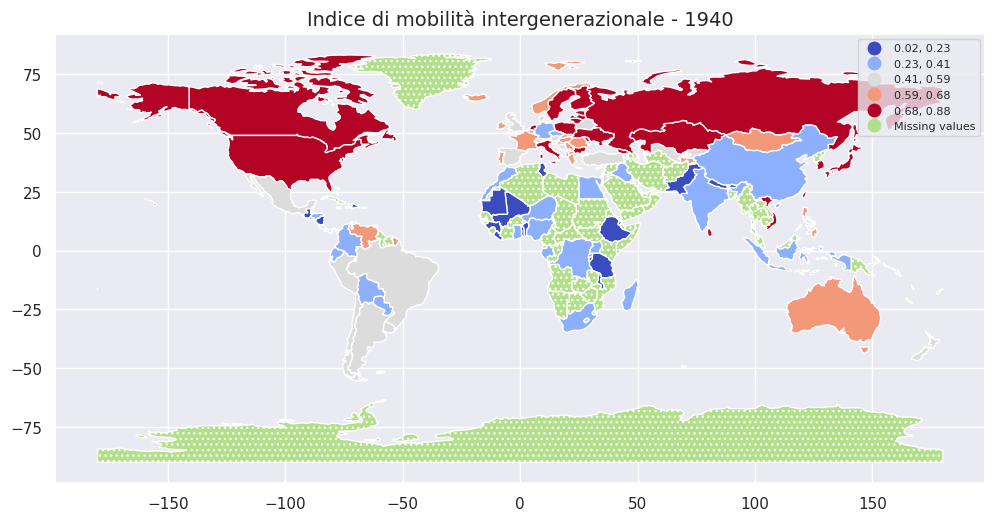

In [24]:
plt.figure(figsize=(12,12))
ax = plt.gca()

world40.plot(column='CAT', ax=ax, legend=True, scheme="quantiles", figsize=(25, 20),  cmap='coolwarm',
            missing_kwds={ 
        "color": "#b2df8a",
        "hatch": "...",
        "label": "Missing values",},)

plt.title("Indice di mobilità intergenerazionale - 1940", fontsize=14) 
plt.show()

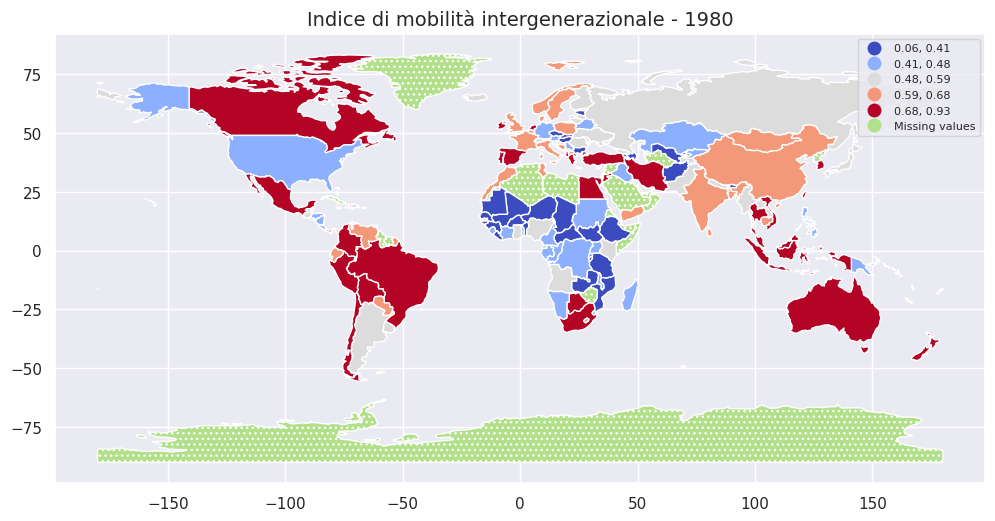

In [25]:
plt.figure(figsize=(12,12))
ax = plt.gca()

world80.plot(column='CAT', ax=ax, legend=True, scheme="quantiles", figsize=(25, 20),  cmap='coolwarm',
            missing_kwds={ 
        "color": "#b2df8a",
        "hatch": "...",
        "label": "Missing values",},)

plt.title("Indice di mobilità intergenerazionale - 1980", fontsize=14) 
plt.show()

Osservando queste due mappe è innanzitutto interessante osservare come nel 1940 fosse evidente una netta distinzione tra nord e sud del mondo in termini di mobilintà educativa intergenerazionale. Questa distinzione si è poi ridotta nel corso del tempo, nello specifico nel 1980 appare evidente come gli stati con un indice di mobilità intergeneraizonale più basso rimangano per lo più concentrati nel continente Africano e nelle aree dell'Asia centrale ed Europa dell'Est.

### Mobilità assoluta intergenerazionale e reddito medio

In questa sezione studio come l'indice di mobilità intergenerazionale varia con il reddito medio degli individui per ciascuno stato. Osservando i risultati delle analisi precedenti, soprattutto la distribuzione geografica dell'indice di mobilità educativa intergenerazionale, mi aspetto complessivamente che il valore dell'inidice aumenti muovendosi da un inferiore verso uno superiore. 

Quindi procedo facendo degli istogrammi, mi aspetto che la distribuzione sia centrata attorno a valori più bassi per un reddito medio inferiore ed attorno ad un valore più alto per redditi medi più elevati. 

In [26]:
high = original_df.loc[original_df.incgroup3 == "High income" ]
middle =  original_df.loc[original_df.incgroup3 == "Middle income"]
low = original_df.loc[original_df.incgroup3 == "Low income" ]

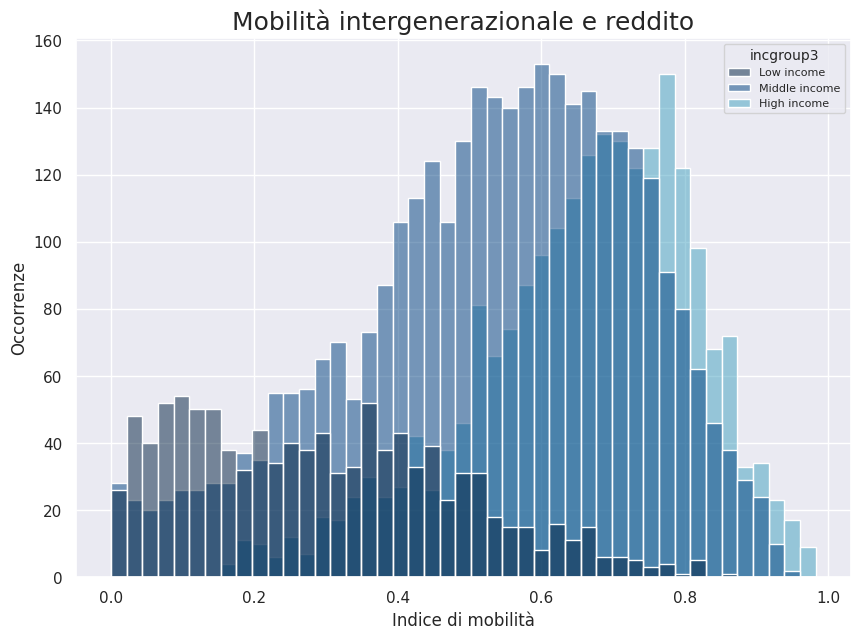

In [27]:
plt.figure(figsize=(10,7))
ax = sns.histplot(data=original_df, x="CAT", hue ="incgroup3", bins=45, palette = 'ocean')
ax.set_xlabel("Indice di mobilità")
ax.set_ylabel("Occorrenze")
ax.set_title("Mobilità intergenerazionale e reddito", fontsize=18)
ax.grid(True)
plt.show()

Il plot soprastante conferma l'ipotesi fatta inizialmente; inoltre è facile osservare come, a parità di indice di mobilità intergenerazionale, il numero di occorrenze di tale indice sia superiore per un reddito medio piuttosto che per un reddito alto. Questo è legato al fatto che una condizione di partenza "intermedia" è quella che consente più mobilità, è più facile migliorare la propria condizione educativa e sociale.

### Mobilità assoluta intergenerazionale e genere

A questo punto, mi concentro sull'ultima categoria rispetto alla quale mia aspetto di individuare una correlazione con l'indice di mobilità intergenerazionale; ovvero il genere.
Per questa analisi utilizzo un boxplot in maniera tale da poter distinguere per reddito e genere.

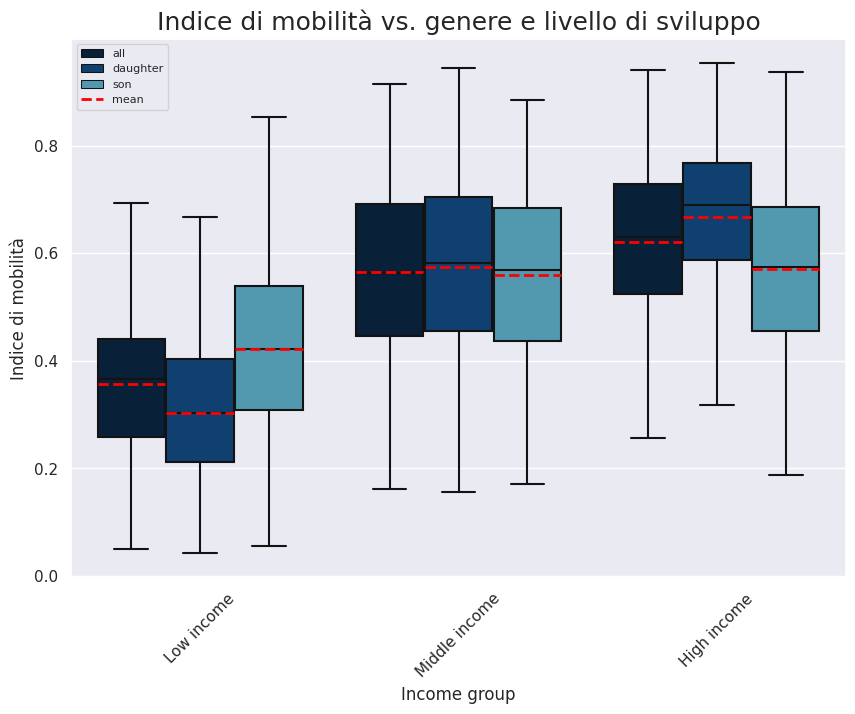

In [28]:
df80 = original_df.loc[original_df.cohort == "1980"]

plt.figure(figsize=(10,7))
meanprops=dict(c='red',lw=2)
ax=sns.boxplot(data=df_80, x="incgroup3", y="CAT", hue="child", fliersize=0, showmeans=True, meanline=True, palette="ocean", meanprops=meanprops)

# Costruisco una legenda che contenga anche l'informazione sulla media
custom_lines = [Line2D([0], [0], color='red', lw=2,ls='--')]
handles, l = ax.get_legend_handles_labels()         
handles1 = np.append(handles,custom_lines)
l1=np.append(l, "mean")

ax.legend(handles1, l1, loc="best")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_xlabel('Income group')
ax.set_ylabel('Indice di mobilità')
ax.set_title("Indice di mobilità vs. genere e livello di sviluppo", fontsize=18);

plt.show()

Il boxplot precedente mostra un'evidente correlazione tra il reddito medio del paese e l'indice di mobilità intergenerazionale per tale paese. Naturalmente si osserva che in condizioni di basso reddito le figlie femmine risultano più svantaggiate rispetto ai figli maschi. Tuttavia, negli anni '80, per le famiglie con un reddito medio-alto, la mobilità intergenerazionale risulta maggiore per le figlie femmine piuttosto che per i figli maschi, questo si spiega anche con la maggiore partecipazione delle donne all'attività economica e sociale del paese durante quegli anni.

## Studio delle correlazioni

A questo punto, come ulteriore verifica di quanto visto finora faccio uno studio delle correlazioni. 
La difficoltà principale in questo caso consiste nella stima delle correlazioni tra dati di tipo categorico.
Per prima cosa ho costruito un nuovo dataframe conenente solo dati categorici, eliminando i dati numerici.

In [29]:
df_new = original_df
delatable = []
stop = 100

for i in range(len(column_names)):
    if column_names[i] == "obs":
        stop = i
    if i > stop:
        delatable.append(column_names[i])

In [30]:
print(delatable)

['P1', 'P2', 'P3', 'P4', 'P5', 'C1', 'C2', 'C3', 'C4', 'C5', 'MEANp', 'MEANc', 'SDp', 'SDc', 'MLD_psu', 'CAT', 'YOS', 'DIF', 'MIX', 'CAT_ISCED0', 'CAT_ISCED1', 'CAT_ISCED2', 'CAT_ISCED34', 'CAT_ISCED5678', 'COR', 'BETA', 'MU050', 'BHQ4', 'Q4Q4', 'BHQ1', 'BHQ2', 'BHQ3', 'Q4BH', 'Q4child']


In [31]:
for cn in delatable:
    df_new = df_new.drop(cn, axis=1)
    
#riaggiungo le colonne CAT e YOS che sono quelle che mi interessano
CAT = list(original_df.CAT)
YOS = list(original_df.YOS)

df_new["CAT"] = CAT
df_new["YOS"] = YOS

df_new.head(10)

,country,code,region,region_noHICgroup,incgroup2,incgroup3,incgroup4,fragile,survey,year,status,cohort,parent,child,obs,CAT,YOS
0,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,Co-residents only,1980,avg,all,3956,0.414355,0.480076
1,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,Co-residents only,1980,avg,daughter,721,0.283075,0.313359
2,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,Co-residents only,1980,avg,son,3235,0.446874,0.521339
3,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,Co-residents only,1980,dad,all,4137,0.350244,0.372781
4,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,Co-residents only,1980,dad,daughter,744,0.230126,0.235220
5,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,Co-residents only,1980,dad,son,3393,0.379182,0.406293
6,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,Co-residents only,1980,max,all,3956,0.336376,0.357819
7,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,Co-residents only,1980,max,daughter,721,0.216109,0.223228
8,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,Co-residents only,1980,max,son,3235,0.365830,0.391207
9,Afghanistan,AFG,South Asia,South Asia,Developing economies,Low income,Low income,Yes,NRVA,2011,Co-residents only,1980,mom,all,4371,0.446155,0.490374


A questo punto, avendo ridotto le variabili che mi interessano posso studiare la correlazione. Per poter calcolare correttamente la correlazione devo "tradurre in valori" anche le informazioni categoricche come la posizione geografica, il PIL procapite all'interno di ciascuno stato, e il tipo di persone su cui è stata fatta l'indagine statistica.

Identifico i dati categorici 

In [32]:
categorical_features=identify_nominal_columns(original_df)
categorical_features

['country',
 'code',
 'region',
 'region_noHICgroup',
 'incgroup2',
 'incgroup3',
 'incgroup4',
 'fragile',
 'survey',
 'status',
 'parent',
 'child']

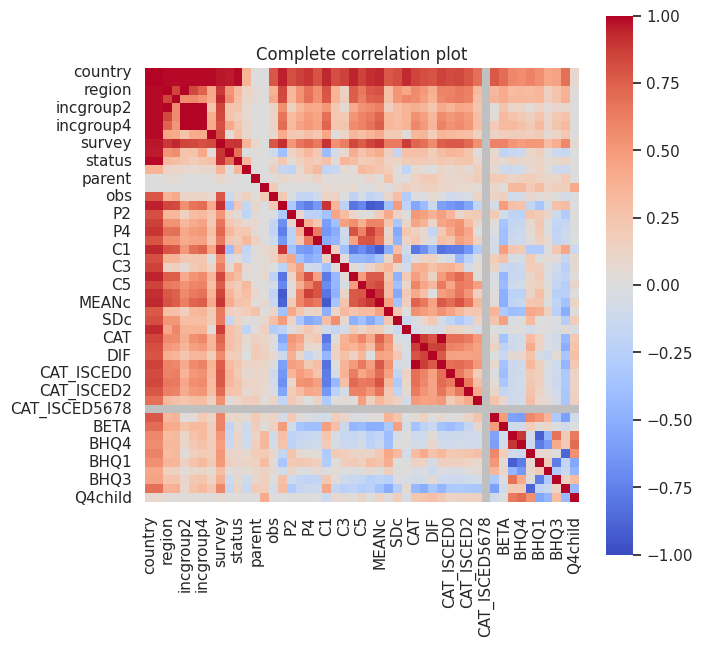

{'corr':                     country      code    region  region_noHICgroup  incgroup2  \
 country            1.000000  1.000000  0.989074           0.989074   0.988706   
 code               1.000000  1.000000  0.989074           0.989074   0.988706   
 region             0.989074  0.989074  1.000000           0.844739   0.999628   
 region_noHICgroup  0.989074  0.989074  0.844739           1.000000   0.554916   
 incgroup2          0.988706  0.988706  0.999628           0.554916   1.000000   
 incgroup3          0.988780  0.988780  0.839286           0.576145   0.999926   
 incgroup4          0.988853  0.988853  0.737788           0.520359   0.999851   
 fragile            0.988706  0.988706  0.435004           0.406534   0.264192   
 survey             0.966410  0.966410  0.886207           0.932305   0.847762   
 year               0.956880  0.956880  0.522378           0.559649   0.257739   
 status             0.988780  0.988780  0.316936           0.292199   0.250587   
 cohort 

In [33]:
associations(original_df, nominal_columns='auto', numerical_columns=None, mark_columns=False, nom_nom_assoc='cramer', num_num_assoc='pearson', ax=None, figsize=(7,7), annot=False, fmt='.2f', cmap="coolwarm", sv_color='silver', cbar=True, vmax=1.0, vmin=None, plot=True, compute_only=False, clustering=False, title="Complete correlation plot", filename=None)

Dal plot della correlazione si può osservare facilmente quanto affermato con le prime analisi, per cui il dato maggiormente correlato all'indice di mobilità intergenerazionale è l'area geografica di appartenenza dello stato (e di conseguenza il suo grado di sviluppo eocnomico).

## Fit

A questo punto, avendo studiato la distribuzione dell'indice di mobilità intergenerazionele rispetto al "reddito medio" di ciascuno stato mi concentro su queste distribuzioni eseguendo un fit rispetto a delle distribuzioni teoriche.

Il fit è stato eseguito con le seguenti funzioni di distribuzione di probabilità
* Gaussiana: $ \rho(x| \mu, \sigma)= \frac{1}{\sqrt{2 \sigma \pi}} e^\frac{-(x-\mu)^2}{2 \sigma^2}$
* Cauchy: $\rho(x| \mu, \gamma) = \frac{\gamma}{\pi ((x-\mu)^2 + \gamma^2)}$
* Gamma: $ \rho(x| \nu, \lambda)= \frac{\lambda^\nu x^{\nu -1} e^{-\lambda x} } {\Gamma(\nu)} $ con $ \Gamma(\nu)= \int_{0}^{\infty} {dt  t^{z-1} e^{-t} } $ Gamma di Eulero
* Gumbel_r: $\rho(x|\alpha, \beta) = e^{-e^{-\alpha (x- \beta)})}$

In [34]:
def print_fit(X):
    
    norm_fit = scipy.stats.norm.fit(X)
    cauc_fit = scipy.stats.cauchy.fit(X)
    gamm_fit = scipy.stats.gamma.fit(X)
    lapl_fit = scipy.stats.gumbel_r.fit(X)

    print('***************************************************************************************')
    print('                                                             ')
    print('Fit Normale (media, std)=  ', norm_fit)                  #maximum likelyhood estimation
    print('Fit Cauchy (loc, gamma)=  ', cauc_fit)
    print('Fit Gamma (alpha, loc, beta)=', gamm_fit)
    print('Fit Gumbel_r (loc, scale)=  ', lapl_fit)
    print('                                                             ')
    print('                                                             ')

    pdf_norm = scipy.stats.norm(norm_fit[0], norm_fit[1])
    pdf_cauc = scipy.stats.cauchy(cauc_fit[0], cauc_fit[1])
    pdf_gamm = scipy.stats.gamma(gamm_fit[0], gamm_fit[1], gamm_fit[2])
    pdf_lapl = scipy.stats.gumbel_r(lapl_fit[0], lapl_fit[1])

In [35]:
def calcolo_fit(X):
    
    norm_fit = scipy.stats.norm.fit(X)
    cauc_fit = scipy.stats.cauchy.fit(X)
    gamm_fit = scipy.stats.gamma.fit(X)
    lapl_fit = scipy.stats.gumbel_r.fit(X)

    pdf_norm = scipy.stats.norm(norm_fit[0], norm_fit[1])
    pdf_cauc = scipy.stats.cauchy(cauc_fit[0], cauc_fit[1])
    pdf_gamm = scipy.stats.gamma(gamm_fit[0], gamm_fit[1], gamm_fit[2])
    pdf_lapl = scipy.stats.beta(lapl_fit[0], lapl_fit[1])
    pdf_lapl = scipy.stats.gumbel_r(lapl_fit[0], lapl_fit[1])
    
    return pdf_norm, pdf_cauc, pdf_gamm, pdf_lapl

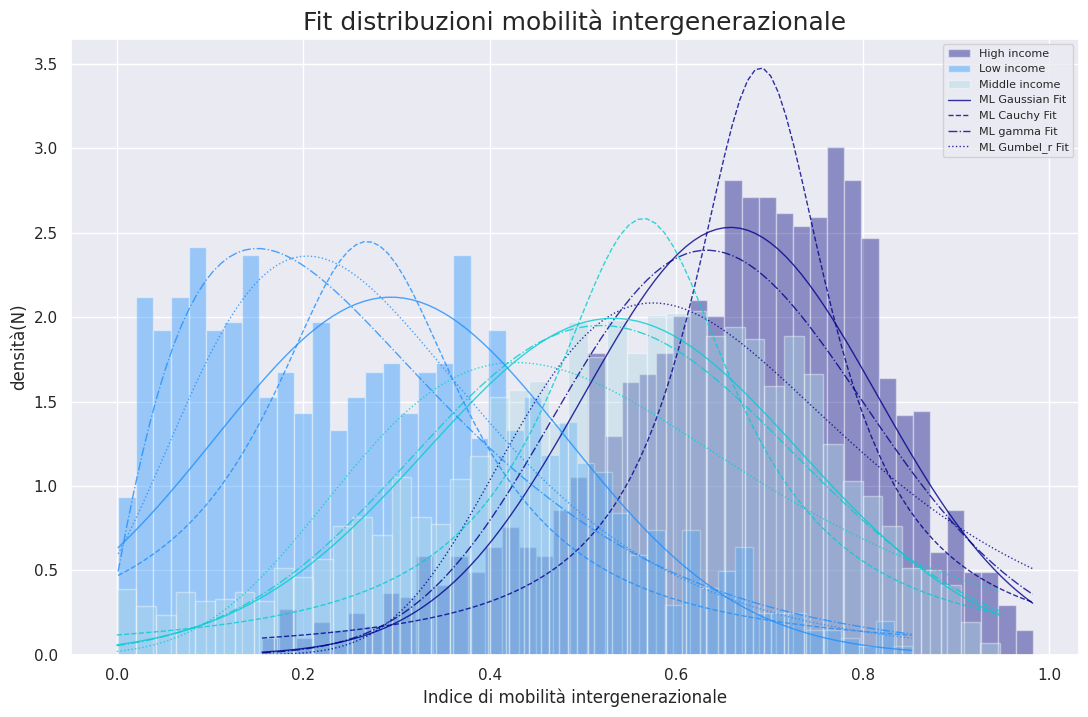

***************************************************************************************
                Fit - High income                       
***************************************************************************************
                                                             
Fit Normale (media, std)=   (0.6582721850291873, 0.1575961813123033)
Fit Cauchy (loc, gamma)=   (0.6902910435163006, 0.09151987923287153)
Fit Gamma (alpha, loc, beta)= (73.03513345022623, -0.7785797016208641, 0.0195934453395191)
Fit Gumbel_r (loc, scale)=   (0.5748640551680692, 0.1765250204396759)
                                                             
                                                             
***************************************************************************************
        Fit - Middle income                       
***************************************************************************************
                                                       

In [36]:
fig = plt.figure(figsize=(13,8))
#fig.suptitle("Istogramma e fit dell'indice di mobilità intergenerazionale")
ax = plt.gca()

highX=high["CAT"]
midX=middle["CAT"]
lowX=low["CAT"]


ax.hist(highX, bins=45, density=True, label='High income', color='navy', alpha=0.4)
ax.hist(lowX, bins=45, density=True, label='Low income', color='dodgerblue', alpha=0.4)
ax.hist(midX, bins=45, density=True, label='Middle income', color='lightblue', alpha=0.4)


#High income
pdf_norm ,pdf_cauc , pdf_gamm,pdf_lapl = calcolo_fit(highX)
X = np.linspace(np.min(highX), np.max(highX), 101)

ax.plot(X, pdf_norm.pdf(X), color='darkblue', linestyle='-', label='ML Gaussian Fit', linewidth=1, alpha=0.8)
ax.plot(X, pdf_cauc.pdf(X), color='darkblue', linestyle='--', label='ML Cauchy Fit', linewidth=1, alpha=0.8)
ax.plot(X, pdf_gamm.pdf(X), color='darkblue', linestyle='-.', label='ML gamma Fit', linewidth=1, alpha=0.8)
ax.plot(X, pdf_lapl.pdf(X), color='darkblue', linestyle='dotted', label='ML Gumbel_r Fit', linewidth=1, alpha=0.8)

#Middle income
pdf_norm ,pdf_cauc , pdf_gamm,pdf_lapl = calcolo_fit(midX)
X = np.linspace(np.min(midX), np.max(midX), 101)

ax.plot(X, pdf_norm.pdf(X), color='darkturquoise', linestyle='-', linewidth=1, alpha=0.8)
ax.plot(X, pdf_cauc.pdf(X), color='darkturquoise', linestyle='--', linewidth=1, alpha=0.8)
ax.plot(X, pdf_gamm.pdf(X), color='darkturquoise', linestyle='-.', linewidth=1, alpha=0.8)
ax.plot(X, pdf_lapl.pdf(X), color='darkturquoise', linestyle='dotted', linewidth=1, alpha=0.8)

#Low income
pdf_norm ,pdf_cauc , pdf_gamm,pdf_lapl = calcolo_fit(lowX)
X = np.linspace(np.min(lowX), np.max(lowX), 101)

ax.plot(X, pdf_norm.pdf(X), color='dodgerblue', linestyle='-', linewidth=1, alpha=0.8)
ax.plot(X, pdf_cauc.pdf(X), color='dodgerblue', linestyle='--', linewidth=1, alpha=0.8)
ax.plot(X, pdf_gamm.pdf(X), color='dodgerblue', linestyle='-.', linewidth=1, alpha=0.8)
ax.plot(X, pdf_lapl.pdf(X), color='dodgerblue', linestyle='dotted', linewidth=1, alpha=0.8)


ax.set_xlabel("Indice di mobilità intergenerazionale")
ax.set_ylabel("densità(N)")
ax.set_title("Fit distribuzioni mobilità intergenerazionale", fontsize = "18")
ax.grid(True)
plt.legend()
plt.show()

print('***************************************************************************************')
print('                Fit - High income                       ')
print_fit(high["CAT"])

print('***************************************************************************************')
print('        Fit - Middle income                       ')
print_fit(middle["CAT"])

print('***************************************************************************************')
print('       Fit - Low income                       ')
print_fit(low["CAT"])

Si osserva immediatamente che nessuno dei fit effettuati rappresenta bene i dati sperimenatli. Per verificare questa osservazione eseguo un test di significatività.

## Test di siginificatività statistica - Kolmogrov Smirnov

Dai fit precedenti sembra che la distribuzione migliroe per descrivere i dati sia la distribuzione gaussiana, tuttavia questa non appare una buona approssimazione. Per studiare meglio questo aspetto faccio un test di Kolmogorov-Smirnov per stabilire la bontà dei fit eseguiti al punto precedente. 

Il test di apprezzamento di un certo dataset consiste nel valutare la massima distanza tra la funzione di distribuzione cumulativa teorica (costruita a partire dalla funzione distribuzione di probabilità) e quella empirica. Nello specifico, la statistica di test K è definita come:

$$ K = \sqrt{N}\cdot D_{MAX} $$

Considero come ipotesi accettabile di compatibilità del fit con i dati sperimentali un p-value con $\alpha > 0.05 $.

In [37]:
def print_KS (X):
    
    norm_fit = scipy.stats.norm.fit(X)
    cauc_fit = scipy.stats.cauchy.fit(X)
    gamm_fit = scipy.stats.gamma.fit(X)
    lapl_fit = scipy.stats.gumbel_r.fit(X)

    gof_norm = scipy.stats.kstest(X, 'norm', N=len(X), args=(norm_fit[0], norm_fit[1]))
    gof_cauc = scipy.stats.kstest(X, 'cauchy', N=len(X), args=(cauc_fit[1], cauc_fit[0]))
    gof_gamm = scipy.stats.kstest(X, 'gamma', N=len(X), args=(gamm_fit[0], gamm_fit[1], gamm_fit[2]))
    gof_lapl = scipy.stats.kstest(X, 'laplace', N=len(X), args=(lapl_fit[0], lapl_fit[1]))


    print('                                                             ')
    print('Fit Normale:  '), print('statistic=', gof_norm[0], '   p-value=', gof_norm[1])
    print('                                                             ')
    print('Fit Cauchy:  '), print('statistic=', gof_cauc[0], '   p-value=', gof_cauc[1])
    print('                                                             ')
    print('Fit Gamma:   '), print('statistic=', gof_gamm[0], '   p-value=', gof_gamm[1])
    print('                                                             ')
    print('Fit Gumbel_r: '), print('statistic=', gof_lapl[0], '   p-value=', gof_lapl[1])
    print('                                                             ')
    print('                                                             ')
    print('                                                             ')

In [38]:
print('***************************************************************************************')
print('                Goodness of fit - Kolmogorov-Smirnov: - High income                       ')
print('***************************************************************************************')
print_KS(high["CAT"])

print('***************************************************************************************')
print('        Goodness of fit - Kolmogorov-Smirnov: - Middle income                       ')
print('***************************************************************************************')
print_KS(middle["CAT"])

print('***************************************************************************************')
print('       Goodness of fit - Kolmogorov-Smirnov: - Low income                       ')
print('***************************************************************************************')
print_KS(low["CAT"])

***************************************************************************************
                Goodness of fit - Kolmogorov-Smirnov: - High income                       
***************************************************************************************
                                                             
Fit Normale:  
statistic= 0.06565819085869523    p-value= 8.626865263501314e-09
                                                             
Fit Cauchy:  
statistic= 0.5675663407118497    p-value= 0.0
                                                             
Fit Gamma:   
statistic= 0.09627666034780896    p-value= 2.0319399016482868e-18
                                                             
Fit Gumbel_r: 
statistic= 0.2625830501238356    p-value= 5.516445937267341e-136
                                                             
                                                             
                                                             

Tra le distribuzioni teoriche provate quella che presenta un p-value migliore è la distribuzione gaussiana, seppur con un p-value troppo piccolo per dire che vi sia effettivamente compatibilità.
Questo osservazione è coerente con il fatto che sto considerando un'area geografica molto estesa, non ho in alcun modo limitato l'area geografica di studio. Inoltre sto analizzando dati raccolti in tempi diversi e con metodi e modalità differenti.

## Conclusioni

Dalle analisi presentate nel notebook si osserva che sono diversi i fattori che influenzano la mobilità educativa intergenrazionale, l'indiche che rappresenta questa informazione infatti presenta un'alta correlazione con le condizioni economiche e sociali di partenza degli individui. Questa correlazione poi si traduce in una correlazione con l'area geografica di provenienza degli individui.

Inoltre, un aspetto importante da tenere in considerazione, è il fatto che la presente analisi dati è in realtà una specie di meta-analisi, cioè una analisi e uno studio realizzato unendo e studiando i dati provenienti da altri studi statistici per poter trarre conclusioni generali ed eventualmente corroborare la validità dei risultati delle singole analisi.
Tuttavia bisogna tenere conto anche delle difficoltà che questo comporta, ad esempio, come riportato nel paper di approfondimento <a name="cite_ref-1"></a>[<sup>[1]</sup>](#cite_note-1), il fatto che l'analisi statistica sia stata condotta in maniera retrospettiva o su adulti co-residenti al momento dell'indagine influenza i risultati di tale analisi.  

<a name="cite_note-1"></a>1. [^](#cite_ref-1) Van der Weide, Roy; Lakner, Christoph; Mahler, Daniel Gerszon; Narayan, Ambar; Ramasubbaiah, Rakesh. 2021. Intergenerational Mobility around the World. Policy Research Working Paper;No. 9707. World Bank, Washington, DC. © World Bank. https://openknowledge.worldbank.org/handle/10986/35827 License: CC BY 3.0 IGO